# TensorFlow Regression Example

## Creating Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 1 Million Points between 0 to 10
x_data = np.linspace(0.0,10.0,1000000)

In [8]:
noise = np.random.randn(len(x_data))

In [9]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [11]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])

print(x_df.head())
print('\n')
print(y_df.head())

    X Data
0  0.00000
1  0.00001
2  0.00002
3  0.00003
4  0.00004


          Y
0  3.494843
1  5.380518
2  4.393839
3  5.145646
4  4.443550


In [12]:
my_data = pd.concat([x_df,y_df],axis=1)

my_data.head()

,X Data,Y
0,0.00000,3.494843
1,0.00001,5.380518
2,0.00002,4.393839
3,0.00003,5.145646
4,0.00004,4.443550


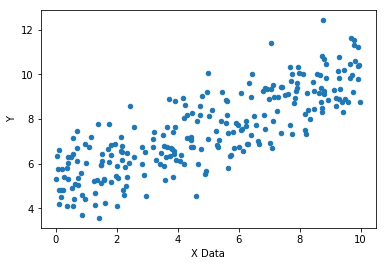

In [13]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

# TensorFlow
## Batch Size

We will take the data in batches (1,000,000 points is a lot to pass in at once)

In [14]:
import tensorflow as tf

In [15]:
# Random 10 data points to grab at a time out of 1,000,000 points
batch_size = 8

** Variables **

In [17]:
np.random.randn(2)

array([-0.06866435,  1.58913218])

In [18]:
m = tf.Variable(-0.06866435)
b = tf.Variable(1.58913218)

** Placeholders **

In [19]:
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

** Graph **

In [20]:
y_model = m*xph + b

** Loss Function **

In [21]:
error = tf.reduce_sum(tf.square(yph-y_model))

** Optimizer **

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

** Initialize Variables **

In [23]:
init = tf.global_variables_initializer()

### Session

In [24]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000  #1000 batches of data will be fed into NN with each batch size = 8 data points 
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        #8 random index data points are taken from range 0 to len(x_data) 
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [25]:
model_m

0.50466835

In [26]:
model_b

4.9344106

### Results

In [27]:
y_hat = x_data * model_m + model_b

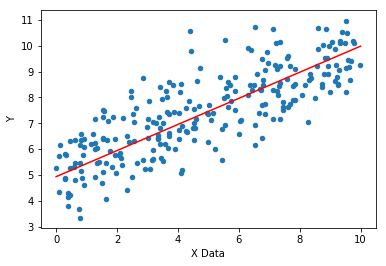

In [28]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

## tf.estimator API

Much simpler API for basic tasks like regression, classification. Example: tf.estimator.LinearRegressor, tf.estimator.LinearClassifier,tf.estimator.DNNRegressor, tf.estimator.DNNClassifier, tf.estimator.DNNLinearCombinedRegressor, tf.estimator.DNNLinearCombinedClassifier.

<img src="EstimatorAPI.JPG">

In [29]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [30]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_num_worker_replicas': 1, '_save_checkpoints_secs': 600, '_model_dir': 'C:\\Users\\SHREEK~1.SAU\\AppData\\Local\\Temp\\tmp2x8ysak2', '_global_id_in_cluster': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001F11E5311D0>, '_log_step_count_steps': 100, '_task_type': 'worker', '_tf_random_seed': None, '_protocol': None, '_task_id': 0, '_save_summary_steps': 100, '_master': '', '_service': None, '_train_distribute': None, '_keep_checkpoint_every_n_hours': 10000, '_eval_distribute': None, '_device_fn': None, '_is_chief': True, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_experimental_distribute': None, '_evaluation_master': '', '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_save_checkpoints_steps': None}


### Train Test Split


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_eval, y_train, y_eval = train_test_split(x_data,y_true,test_size=0.3, random_state = 101)

In [33]:
print(x_train.shape)
print(y_train.shape)

print(x_eval.shape)
print(y_eval.shape)

(700000,)
(700000,)
(300000,)
(300000,)


### Set up Estimator Inputs

In [35]:
# Can also do .pandas_input_fn
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [36]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [37]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8,num_epochs=1000,shuffle=False)

### Train the Estimator

In [38]:
estimator.train(input_fn=input_func,steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmp2x8ysak2\model.ckpt.
INFO:tensorflow:loss = 379.72354, step = 1
INFO:tensorflow:global_step/sec: 448.106
INFO:tensorflow:loss = 43.517487, step = 101 (0.226 sec)
INFO:tensorflow:global_step/sec: 339.313
INFO:tensorflow:loss = 19.824223, step = 201 (0.294 sec)
INFO:tensorflow:global_step/sec: 556.7
INFO:tensorflow:loss = 17.63308, step = 301 (0.181 sec)
INFO:tensorflow:global_step/sec: 546.056
INFO:tensorflow:loss = 17.52

### Evaluation

In [39]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-06-21:48:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmp2x8ysak2\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-06-21:48:18
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0637494, global_step = 1000, label/mean = 7.5097966, loss = 8.509995, prediction/mean = 7.326621
INFO:tensorflow:Saving 'checkpoin

In [40]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-06-21:48:48
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmp2x8ysak2\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-06-21:48:50
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0795687, global_step = 1000, label/mean = 7.488464, loss = 8.63655, prediction/mean = 7.3061438
INFO:tensorflow:Saving 'checkpoint

In [44]:
print('Training Data Metrics')
print("train metrics: {}".format(train_metrics))
print('\n')
print("eval metrics: {}".format(eval_metrics))

Training Data Metrics
train metrics: {'loss': 8.509995, 'global_step': 1000, 'average_loss': 1.0637494, 'prediction/mean': 7.326621, 'label/mean': 7.5097966}


eval metrics: {'loss': 8.63655, 'global_step': 1000, 'average_loss': 1.0795687, 'prediction/mean': 7.3061438, 'label/mean': 7.488464}


### Predictions

In [47]:
brand_new_data = np.linspace(0,10,10)

input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [48]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmp2x8ysak2\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.491821], dtype=float32)},
 {'predictions': array([5.1214933], dtype=float32)},
 {'predictions': array([5.751166], dtype=float32)},
 {'predictions': array([6.3808384], dtype=float32)},
 {'predictions': array([7.010511], dtype=float32)},
 {'predictions': array([7.640183], dtype=float32)},
 {'predictions': array([8.2698555], dtype=float32)},
 {'predictions': array([8.8995285], dtype=float32)},
 {'predictions': array([9.5292015], dtype=float32)},
 {'predictions': array([10.158873], dtype=float32)}]

In [49]:
predictions = []# np.array([])
for x in estimator.predict(input_fn=input_fn_predict):
    predictions.append(x['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SHREEK~1.SAU\AppData\Local\Temp\tmp2x8ysak2\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [50]:
predictions

[array([4.491821], dtype=float32),
 array([5.1214933], dtype=float32),
 array([5.751166], dtype=float32),
 array([6.3808384], dtype=float32),
 array([7.010511], dtype=float32),
 array([7.640183], dtype=float32),
 array([8.2698555], dtype=float32),
 array([8.8995285], dtype=float32),
 array([9.5292015], dtype=float32),
 array([10.158873], dtype=float32)]

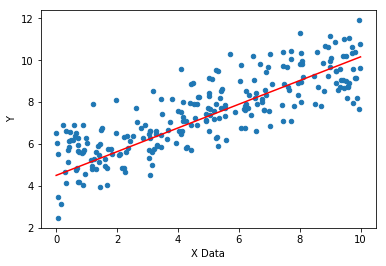

In [51]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(np.linspace(0,10,10),predictions,'red')